<div style="text-align:left;font-size:2em"><span style="font-weight:bolder;font-size:1.25em">SP2273 | Learning Portfolio</span><br><br><span style="font-weight:bold;color:darkred">Numerical Solutions (Need)</span></div>

## 1 A Bucket of water

### 1.1 Getting a feel

Start with a simple system consisting of a bucket filled with a faucet. Tap provides water at a rate of 5 L/mins. Get a feel for dynamics of this system by creating a table:

| **#** | **Time Step (Δt)** | **Elasped Time (t)** | **Rate (R)** | **Change in Volume (ΔV)** | **Total Volume (V)** |
|:-----:|:------------------:|:--------------------:|:------------:|:-------------------------:|:--------------------:|
|   0   |       .5 mins      |       0.0 mins       |    5 L/min   |            0.0            |         0.0 L        |
|   1   |       .5 mins      |       0.5 mins       |    5 L/min   |           2.5 L           |         2.5 L        |
|   2   |       .5 mins      |       1.0 mins       |    5 L/min   |           2.5 L           |         5.0 L        |
|   3   |       .5 mins      |       1.5 mins       |    5 L/min   |           2.5 L           |         7.5 L        |
|   4   |       .5 mins      |       2.0 mins       |    5 L/min   |           2.5 L           |        10.0 L        |
|   5   |       .5 mins      |       2.5 mins       |    5 L/min   |           2.5 L           |        12.5 L        |

R is the rate and ΔV is the change in volume that corresponds to a time step of ΔV 

$ΔV - RΔT$

Text(0.5, 0, 'Time(mins)')

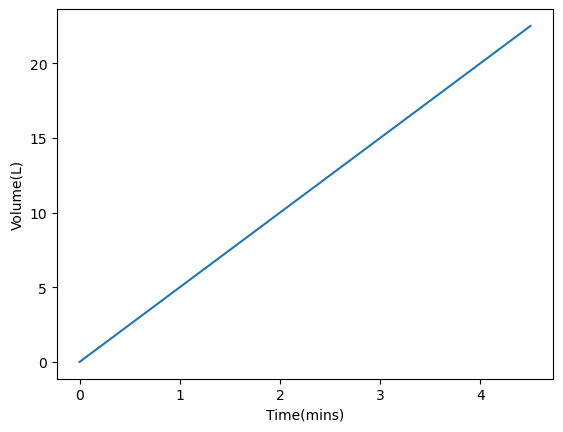

In [2]:
max_time = 5                     # Maximum time (mins)
dt = .5                          # Time step (mins)
rate = 5                         # Rate (L/min)
all_volume = []                  # To keep track of all volumes
volume = 0                       # Starting volume

all_time = np.arange(start=0, stop=max_time, step=dt)

for time in all_time:
    all_volume.append(volume)    # Record volume
    dV = rate * dt               # Calculate change in volume
    volume += dV                 # Update the new volume

# Because we can...
from matplotlib import pyplot as plt
plt.plot(all_time, all_volume)
plt.ylabel('Volume(L)')
plt.xlabel('Time(mins)')

### 1.2 An overflowing bucket

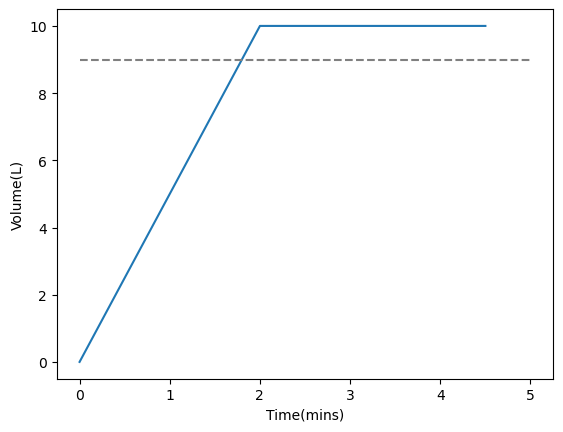

In [3]:
#imagine bucket has maximum volume of 9L
#impose a simple if statement
max_time = 5                     # Maximum time (mins)
dt = .5                          # Time step (mins)
rate = 5                         # Rate (L/min)
bucket_capacity = 9              # L
all_volume = []                  # To keep track of all volumes
volume = 0                       # Starting volume

all_time = np.arange(start=0, stop=max_time, step=dt)

for time in all_time:
    all_volume.append(volume)
    dV = rate * dt
    if volume <= bucket_capacity:
        volume += dV             # Update the new volume

plt.plot(all_time, all_volume)
plt.ylabel('Volume(L)')
plt.xlabel('Time(mins)')
plt.hlines(bucket_capacity, 0, max_time, colors='grey', ls='dashed')

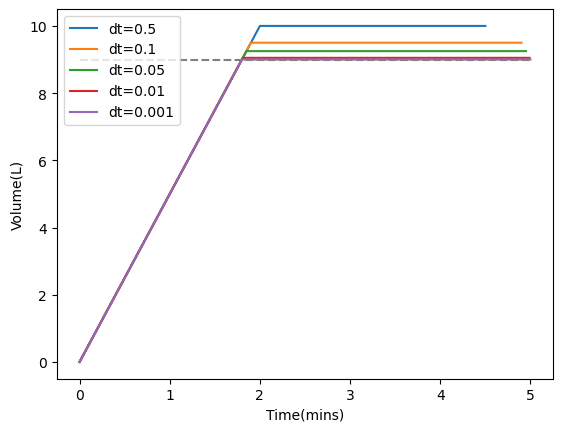

In [4]:
#bucket is still filling beyond 9L before it stops increasing
#problem is timestep too large
#make it smaller
#try different timestep with a for loop to see what works best

max_time = 5                     # Maximum time (mins)
dt = .5                          # Time step (mins)
rate = 5                         # Rate (L/min)
bucket_capacity = 9              # L

#trying different timestep
for dt in [0.5, 0.1, 0.05, 0.01, 0.001]:
    all_volume = []                  # To keep track of all volumes
    volume = 0                       # Starting volume

    all_time = np.arange(start=0, stop=max_time, step=dt)

    for time in all_time:
        all_volume.append(volume)
        dV = rate * dt
        if volume <= bucket_capacity:
            volume += dV

    plt.plot(all_time, all_volume, label=f'dt={dt}')

plt.ylabel('Volume(L)')
plt.xlabel('Time(mins)')
plt.hlines(bucket_capacity, 0, max_time, colors='grey', ls='dashed')
plt.legend()


Since I want to change dt, I have pushed everything that depends on it under the for loop. 

Based on the plots, timestep of 0.01 or 0.001 works best. Shall pick 0.01 because this means the for loop runs fewer times.

### 1.3 A leaky bucket

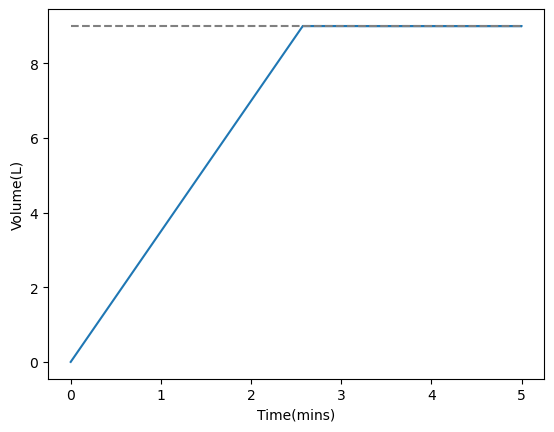

In [6]:
#now add a hole to bucket causing it to leak at a rate of 1.5L/min
max_time = 5                     # Maximum time (mins)
dt = .001                        # Time step (mins)
rate = 5                         # Filling rate (L/min)
leak_rate = 1.5                  # L/min
bucket_capacity = 9              # L
all_volume = []                  # To keep track of all volumes
volume = 0                       # Starting volume

all_time = np.arange(start=0, stop=max_time, step=dt)

for time in all_time:
    all_volume.append(volume)

    dV = rate * dt
    leak_volume = leak_rate * dt
    volume -= leak_volume

    if volume <= bucket_capacity:
        volume += dV             # Update the new volume

plt.plot(all_time, all_volume)
plt.ylabel('Volume(L)')
plt.xlabel('Time(mins)')
plt.hlines(bucket_capacity, 0, max_time, colors='grey', ls='dashed')


It takes longer for the bucket to fill. But even then, once filled, the inflow is at rate faster than the leak, hence bucket remains full.

### 1.4 Let’s turn off the tap

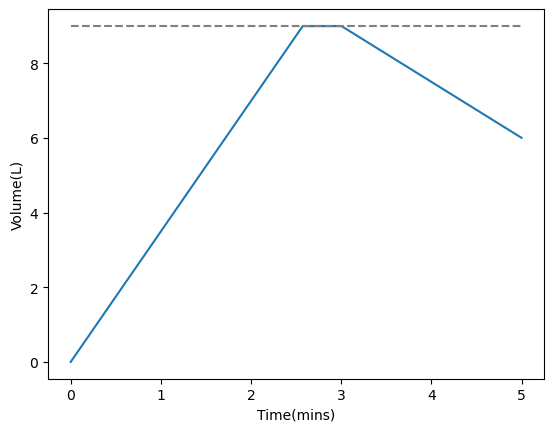

In [7]:
#Say we off the tap after 3mins
#impose by modifying the if condition

tap_off_time = 3                 # When the tap goes off
max_time = 5                     # Maximum time (mins)
dt = .001                        # Time step (mins)
rate = 5                         # Filling rate (L/min)
leak_rate = 1.5                  # L/min
bucket_capacity = 9              # L
all_volume = []                  # To keep track of all volumes
volume = 0                       # Starting volume

all_time = np.arange(start=0, stop=max_time, step=dt)

for time in all_time:
    all_volume.append(volume)
    dV = rate * dt

    leak_volume = leak_rate * dt
    volume -= leak_volume

    if (volume <= bucket_capacity) and (time < tap_off_time):
        volume += dV             

plt.plot(all_time, all_volume)
plt.ylabel('Volume(L)')
plt.xlabel('Time(mins)')
plt.hlines(bucket_capacity, 0, max_time, colors='grey', ls='dashed')


### Using while

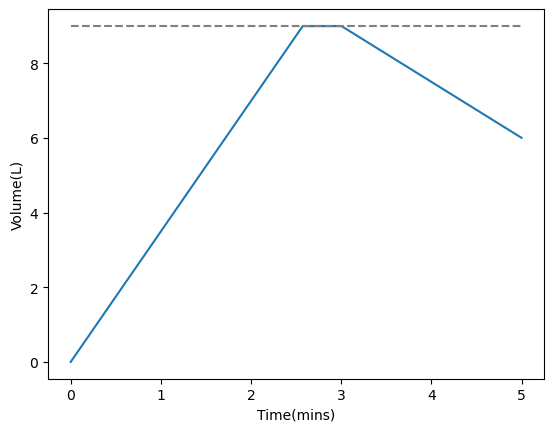

In [8]:
#Before moving on, this is how to use a while statement to run the same simulation
#while can be useful in such cases because all variables (e.g. time and volume) are treated equally

tap_off_time = 3                 # When the tap goes off
max_time = 5                     # Maximum time (mins)
dt = .001                        # Time step (mins)
rate = 5                         # Filling rate (L/min)
leak_rate = 1.5                  # L/min
bucket_capacity = 9              # L
all_volume = []                  # To keep track of all volumes
all_time = []                    # To keep track of all times
volume = 0                       # Starting volume
time = 0

while time <= max_time:
    all_time.append(time)
    all_volume.append(volume)
    dV = rate * dt

    leak_volume = leak_rate * dt
    volume -= leak_volume

    if (volume <= bucket_capacity) and (time < tap_off_time):
        volume += dV    

    time += dt             

plt.plot(all_time, all_volume)
plt.ylabel('Volume(L)')
plt.xlabel('Time(mins)')
plt.hlines(bucket_capacity, 0, max_time, colors='grey', ls='dashed')


### 1.5 A quick summary

Started with a bucket, more details were slowly added. Little had to be altered to our code to add these details. The 'story' can be easily understood just by looking at the code. This shows a glimpse of the power of programming with Python over other methods such as spreadsheets: simplicity of syntax, transparency of the processes and ease of making changes.

Irrespective of how complicated the system or problem is, the strategy to be adopted will be the same, simple one:

1. Establish a relationship that connects the changes of the variables.
2. Pick a starting value.
3. Take a step, and calculate the changes.
4. Update the variables
5. Keep on going until you have the desired number of points
6. If you want to improve accuracy, take smaller steps


### 1.6 We just solved a differential equation!

The example with the bucket is actually one related to a simple differential equation. Namely:

$\frac{dV}{dt} = R$

Most mathematical equations are succinct ways of telling a story. The above says that how fast the volume ($V$) changes as time passes equals a constant $R$. More accurately, the symbol on the LHS reads as ‘rate of change of $V$ with respect to $t$’.

Can **appproximate** this relationship as the following fraction:

$\frac{ΔV}{Δt}$ ≈ $\frac{dV}{dt} = R$

Approximation becomes more accurate the smaller we make Δt.

Rearranging the above equation, we end up with:

$ΔV = RΔt$

Which is what we started with

## 2 Simulating Radioactivity

### 2.1 Introduction

will be solving the differential equation related to radioactive decay in this section. The experimentally observed mathematical relationship that governs the decay of a sample of radioactive material is given by:

$\frac{dN}{dt} = −λN$

$N$ is the number of radioactive nuclei and λ is a characteristic number called the '**decay constant**' of the radioactive species.


### 2.2 Approximating the differential equation

#Following the strategy and recasting the differential equation in an approximate form:


$\frac{ΔN}{Δt} ≈ - λN$

-> $ΔN ≈ - λNΔt$



### 2.3 Getting a feel

| **Step** | **Time (Δt)**        | **N(t)**(x10^9) | **Δt** | **ΔN(x10^9)** |
|:--------:|----------------------|:---------------:|:------:|:-------------:|
|     0    | t0 = 0               |        1        |  0.001 |     -0.142    |
|     1    | t1 = t0 + Δt = 0.001 |      0.858      |  0.001 |     -0.122    |
|     2    | t2 = t1 + Δt = 0.002 |      0.736      |  0.001 |     -0.105    |
|     3    | t3 = t2 + Δt = 0.003 |      0.631      |  0.001 |    -0.0896    |
|     4    | t4 = t3 + Δt = 0.004 |      0.541      |  0.001 |    -0.0768    |
|     5    | t5 = t4 + Δt = 0.005 |      0.464      |  0.001 |    -0.0660    |
|     6    | t6 = t5 + Δt = 0.006 |      0.398      |  0.001 |    -0.0565    |


### 2.4 Let’s write some code

Text(0.5, 0, 'Time(Millions of years)')

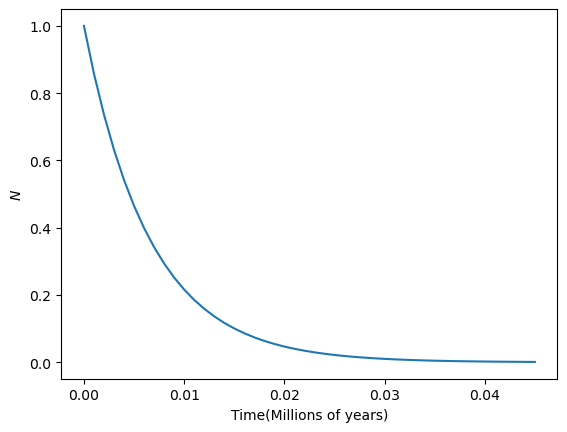

In [10]:
decay_constant = 142       # For 85 Rb (per Myr)
stop_fraction = 1E-3       # stop when the sample has shrunk to
                           # this fraction of the starting value
N0 = 1                     # Starting value of N (in billions of atoms)
dt = .001
time, N = 0, N0            # Starting values

all_N, all_time = [], []

while True:
    all_time.append(time)
    all_N.append(N)

    dN = -decay_constant*N*dt
    N += dN

    if N < N0*stop_fraction:
        break

    time += dt


plt.plot(all_time, all_N)
plt.ylabel('$N$')
plt.xlabel('Time(Millions of years)')

### 2.5 Some things to note about the code

The code usese a True condition with the while loop. So, it will keep running until I break out on my own. To break out, I check if the $N$ has been reduced to a negligible amount which I have defined using stop_fraction.

### 2.6 A quick summary

Strategy to solve differential equation:

1. Rewrite the equation in an approximate form that connects the changes of one variable to another i.e.

$\frac{dN}{dt} = -λN -> ΔN ≈ - λNΔt$

2. Picking starting values for the variables
3. Step the control variable (time in the previous case) and calculate the corresponding changes in the other variables
4. Update the variables
5. Repeat until you reach the desired end
6. Make the step size smaller if you want greater accuracy

This method is named the Euler Method

## Exercise 1 :  A more realistic leak

/var/folders/tm/l4l9jvgj3hg7wdl__1n2t7gm0000gn/T/ipykernel_57759/2308746683.py:17: RuntimeWarning: invalid value encountered in sqrt
  speed_of_water = np.sqrt(2*g*h) #m/s


Text(0.5, 0, 'Time(mins)')

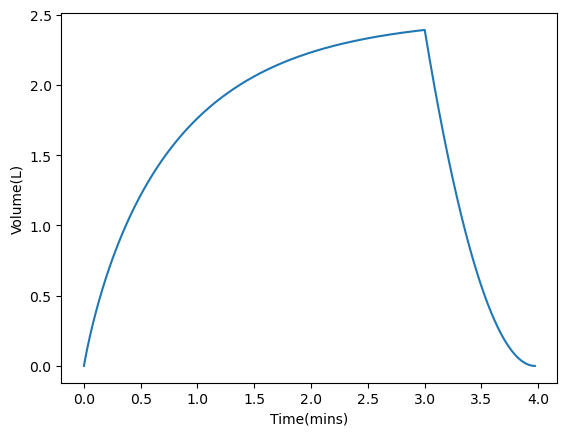

In [36]:
tap_off_time = 3                 # When the tap goes off
max_time = 5                     # Maximum time (mins)
dt = .001                        # Time step (mins)
rate = 5                         # Filling rate (L/min)
leak_rate = 1.5                  # L/min
bucket_capacity = 9              # L
all_volume = []                  # To keep track of all volumes
all_time = []                    # To keep track of all times
volume = 0                       # Starting volume
time = 0

def leak_rate(volume):
    g = 9.8 #m/s^2
    base = 700 #cm^2
    h = 10*(volume/base) #h in metres
    hole = 10**(-4) #m^2
    speed_of_water = np.sqrt(2*g*h) #m/s
    leak_rate = ((hole * speed_of_water) / 10**(-3)) * 60 #L/min
    return leak_rate

while time <= max_time:
    all_time.append(time)
    all_volume.append(volume)
    dV = rate * dt

    leak_volume = leak_rate(volume) * dt
    volume -= leak_volume

    if (volume <= bucket_capacity) and (time < tap_off_time):
        volume += dV    

    time += dt             

plt.plot(all_time, all_volume)
plt.ylabel('Volume(L)')
plt.xlabel('Time(mins)')